### **Analisis Komparatif Algoritma Machine Learning untuk Prediksi Harga Rumah Berdasarkan Dataset Jabodetabek**

Permasalahan :

Bagaimana membangun model prediksi harga rumah yang akurat, efisien, dan dapat diandalkan, serta menentukan model mana yang paling baik berdasarkan evaluasi komparatif antar algoritma.

Tujuan :

untuk mengevaluasi performa berbagai algoritma regresi dalam memprediksi harga rumah, serta untuk mengidentifikasi model yang memberikan akurasi terbaik berdasarkan metrik evaluasi seperti RMSE dan R².

untuk melihat seberapa baik masing-masing model dalam merepresentasikan data aktual, sehingga dapat dinilai secara visual dan numerik konsistensi serta keakuratan prediksi yang dihasilkan.

untuk melakukan evaluasi mendalam terhadap model terbaik yang telah dipilih, dengan menganalisis selisih antara nilai prediksi dan nilai aktual guna memahami pola kesalahan (residual) serta potensi perbaikannya.

In [9]:
from google.colab import files

uploaded = files.upload()

Saving jabodetabek_house_price.csv to jabodetabek_house_price.csv


## **1. Import Library**

Mengimpor pustaka-pustaka:

pandas untuk manipulasi data.

sklearn untuk membuat model Machine Learning.

matplotlib dan seaborn untuk visualisasi.

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load Dataset**

Membaca dataset rumah dari file .csv.

In [11]:
df = pd.read_csv('jabodetabek_house_price.csv')

In [7]:
print(df.columns)

Index(['url', 'price_in_rp', 'title', 'address', 'district', 'city', 'lat',
       'long', 'facilities', 'property_type', 'ads_id', 'bedrooms',
       'bathrooms', 'land_size_m2', 'building_size_m2', 'carports',
       'certificate', 'electricity', 'maid_bedrooms', 'maid_bathrooms',
       'floors', 'building_age', 'year_built', 'property_condition',
       'building_orientation', 'garages', 'furnishing'],
      dtype='object')


Melihat sebagian isi data.

In [ ]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Mengecek ukuran (baris x kolom).

In [ ]:
df.shape

(3553, 27)

Mengecek apakah ada data yang kosong.

In [ ]:
print(df.isnull().sum())  # Cek kolom dengan nilai kosong

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64


Melihat statistik numerik.

In [ ]:
print(df.describe())      # Statistik ringkas fitur numerik

        price_in_rp          lat         long     bedrooms    bathrooms  \
count  3.553000e+03  3553.000000  3553.000000  3519.000000  3524.000000   
mean   4.191685e+09    -6.324721   106.792881     3.326513     2.624858   
std    1.375067e+10     0.129245     0.172159     2.672148     2.696497   
min    4.200000e+07    -6.894828   106.402315     1.000000     1.000000   
25%    8.000000e+08    -6.397933   106.687295     2.000000     2.000000   
50%    1.500000e+09    -6.300733   106.799954     3.000000     2.000000   
75%    3.590000e+09    -6.231754   106.874766     4.000000     3.000000   
max    5.800000e+11    -6.102478   109.771691    99.000000    99.000000   

       land_size_m2  building_size_m2     carports  maid_bedrooms  \
count   3551.000000       3551.000000  3553.000000    3553.000000   
mean     204.806815        186.587440     1.197861       0.496482   
std      402.127746        248.443471     1.114996       0.685723   
min       12.000000          1.000000     0.0000

Melihat sebaran data berdasarkan kota.

In [ ]:
print(df['city'].value_counts())  # Distribusi lokasi

city
Bogor              881
Tangerang          851
Bekasi             586
Depok              526
Jakarta Selatan    240
Jakarta Barat      206
Jakarta Utara      130
Jakarta Timur       95
Jakarta Pusat       38
Name: count, dtype: int64


## **3. Tentukan Target dan Fitur**

y = harga rumah (price_in_rp) sebagai target prediksi

X = Semua kolom selain target masuk dulu

In [ ]:
import numpy as np
y = np.log1p(df['price_in_rp'])  # Target: harga rumah skala log
X = df.drop(columns=['price_in_rp'])  # Semua kolom selain target masuk dulu

## **4.    Pisahkan Fitur Numerik dan Kategorikal**

Membedakan mana fitur numerik (angka) dan mana yang kategorikal (teks).

In [ ]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

## **5. Buat Pipeline Preprocessing**

Numerik: Isi data kosong dengan median.

Kategorikal: Isi kosong dengan modus, lalu encode (One-Hot Encoding).

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

## **6. Gabungkan dengan Random Forest**

Gabungkan preprocessing dengan model Random Forest ke dalam satu pipeline.

In [ ]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

## **7. Split Data untuk Pelatihan dan Pengujian**

Pisahkan data menjadi:

*   80% untuk training
*   20% untuk testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **8. Latih Model**

Melatih model Random Forest dengan data training.

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['lat', 'long', 'bedrooms',
                                                   'bathrooms', 'land_size_m2',
                                                   'building_size_m2',
                                                   'carports', 'maid_bedrooms',
                                                   'maid_bathrooms', 'floors',
                                                   'building_age', 'year_built',
                                                   'garages']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['url', 'title', 'address',
                                                   'district', 'city',
                                                   'facilities',
                                                   'property_type', 'ads_id',
                                                   'certificate', 'electricity',
                                                   'property_condition',
                                                   'building_orientation',
                                                   'furnishing'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

## **9. Evaluasi Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 0.10865462828908166
R2: 0.9127333431700937


In [ ]:
encoded_features = model.named_steps['preprocessing'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(cat_features)
all_features = num_features + list(encoded_features)

## **10. Ambil Feature Importance**
Eksperimen awal

Mengambil nama-nama fitur yang telah diubah (termasuk One-Hot Encoding) dan mencari seberapa penting masing-masing fitur.

In [ ]:
importances = model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ambil 10 teratas
top10_features = importance_df.head(10)['Feature'].tolist()
print("10 fitur paling berpengaruh:", top10_features)

10 fitur paling berpengaruh: ['building_size_m2', 'land_size_m2', 'long', 'lat', 'maid_bathrooms', 'bathrooms', 'electricity_1300 mah', 'electricity_2200 mah', 'bedrooms', 'floors']


## **11. Visualisasikan Fitur Terpenting**

Menampilkan 15 fitur terpenting dalam bentuk grafik batang.

<ipython-input-150-935869279>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='mako')


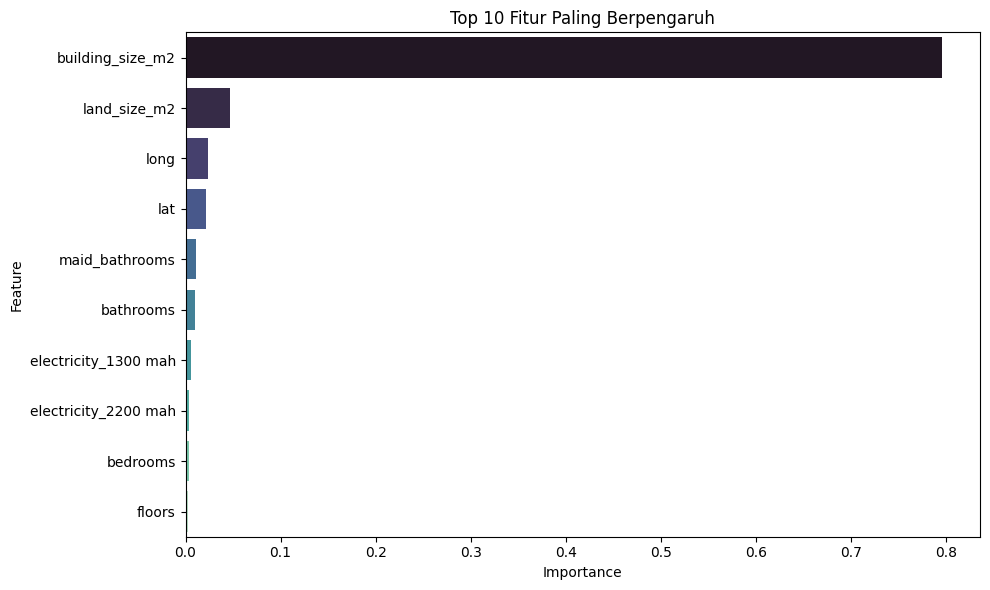

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='mako')
plt.title('Top 10 Fitur Paling Berpengaruh')
plt.tight_layout()
plt.show()

Kesimpulan dari Grafik :

Fitur building_size_m2 sangat dominan dibanding fitur lainnya, dengan skor importance mendekati 0.85. Ini berarti luas bangunan sangat memengaruhi harga rumah menurut model.

Fitur berikutnya seperti land_size_m2, long, dan lat masih berpengaruh tapi jauh lebih kecil.

Fitur-fitur lain seperti jumlah bathrooms, maid_bathrooms, electricity_1300 mah, floors dan lainnya pengaruhnya relatif kecil atau mendekati nol.

Jadi ? Model Random Forest secara otomatis menilai bahwa luas bangunan adalah fitur terpenting dalam menentukan harga rumah. Artinya, jika kamu ingin menyederhanakan model, kamu bisa fokus pada fitur-fitur teratas di grafik ini.

## **A. Melakukan pengujian dan membandingkan dengan beberapa model lain**
Eksperimen Model

In [ ]:
for name, regressor in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', regressor)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {name} ---")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()



--- Random Forest ---
Mean Squared Error: 0.10865462828908166
R-squared: 0.9127333431700937

--- Gradient Boosting ---
Mean Squared Error: 0.11533786287381109
R-squared: 0.9073656607418068

--- Linear Regression ---
Mean Squared Error: 0.19952495219838182
R-squared: 0.8397502636871171

--- Support Vector Regressor ---
Mean Squared Error: 0.25329712228263934
R-squared: 0.7965628027603948



In [ ]:
import matplotlib.pyplot as plt

# Simpan hasil evaluasi
results = {}

for name, regressor in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', regressor)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

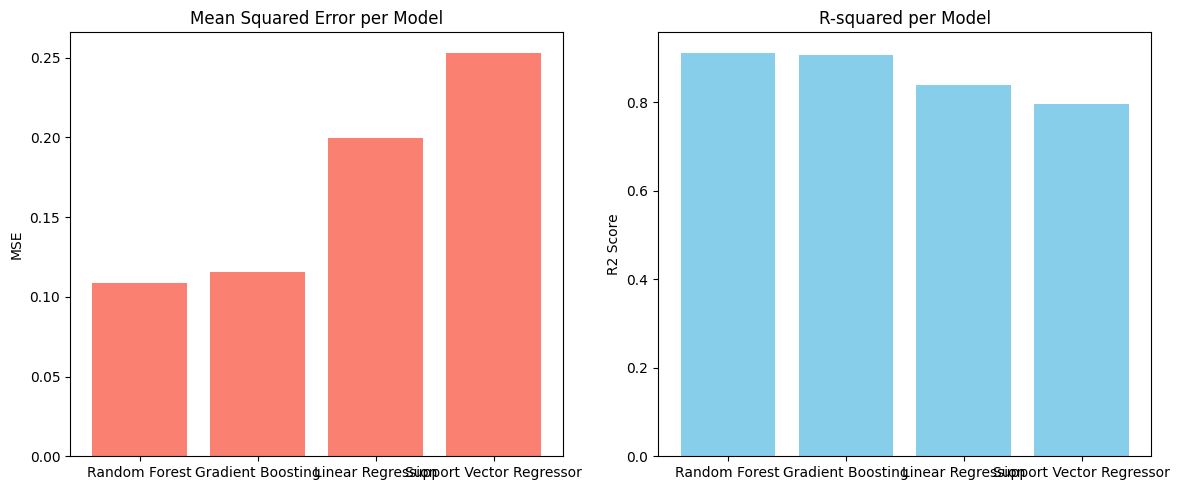

In [ ]:
# Visualisasi
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
r2_values = [results[name]['R2'] for name in model_names]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='salmon')
plt.title('Mean Squared Error per Model')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='skyblue')
plt.title('R-squared per Model')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

Hasil uji coba menghasilkan

Berdasarkan hasil evaluasi dari empat model regresi, Random Forest menunjukkan performa terbaik dengan nilai Mean Squared Error (MSE) terendah sebesar 0.1087 dan R-squared (R²) tertinggi sebesar 0.9127, yang berarti model ini paling akurat dalam memprediksi harga rumah dan mampu menjelaskan sekitar 91% variasi data. Disusul oleh Gradient Boosting yang memiliki performa hampir setara dengan MSE sebesar 0.1153 dan R² sebesar 0.9074. Sementara itu, Linear Regression dan Support Vector Regressor (SVR) menunjukkan performa yang lebih rendah dengan MSE dan R² yang kurang baik, menandakan kemampuan prediksi yang lebih terbatas. Dengan demikian, Random Forest dapat disimpulkan sebagai model paling optimal untuk digunakan dalam prediksi harga rumah pada dataset ini.

## **B. Melakukan Perbandingan harga asli dan prediksi untuk tiap model**

membandingkan harga asli dan prediksi dari setiap model dengan menampilkan grafik scatter, di mana titik yang semakin mendekati garis merah putus-putus menunjukkan prediksi yang semakin akurat terhadap harga sebenarnya.

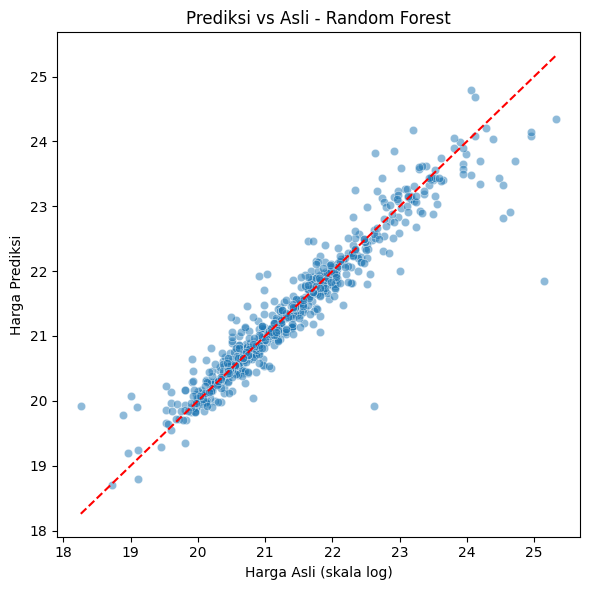

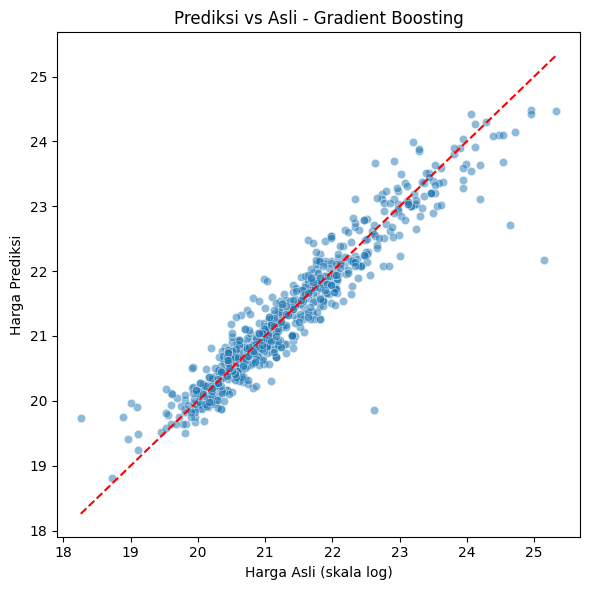

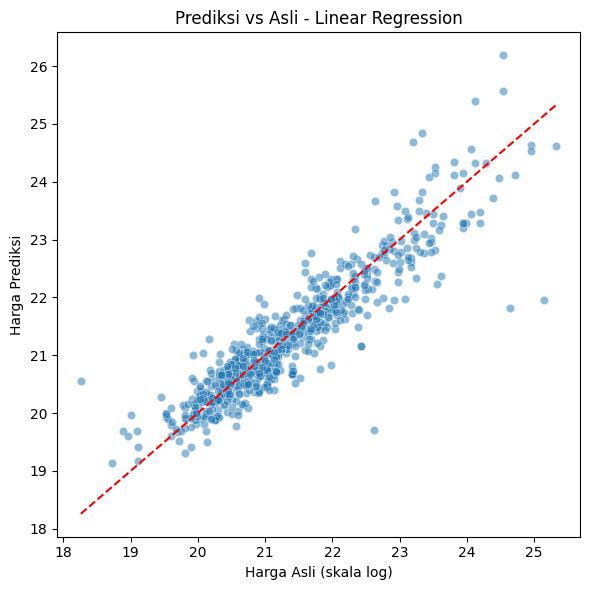

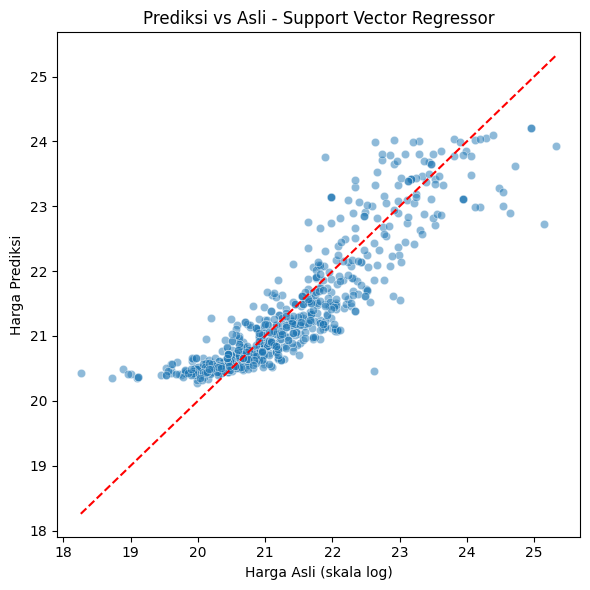

In [ ]:
import seaborn as sns

# Visualisasi perbandingan harga asli dan prediksi untuk tiap model
for nama_model, regressor in models.items():
    pipeline = Pipeline([
        ('pra-pemrosesan', preprocessor),
        ('model', regressor)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi
    plt.xlabel("Harga Asli (skala log)")
    plt.ylabel("Harga Prediksi")
    plt.title(f"Prediksi vs Asli - {nama_model}")
    plt.tight_layout()
    plt.show()

Hasil percobaan :

Berdasarkan hasil perbandingan antara harga asli dan harga prediksi dari keempat model, dapat disimpulkan bahwa model Random Forest memberikan hasil prediksi paling akurat dengan titik-titik yang rapat mengikuti garis ideal, disusul oleh Gradient Boosting yang juga menunjukkan performa sangat baik meskipun sedikit lebih menyebar. Model Linear Regression menunjukkan performa yang cukup baik namun masih memiliki penyebaran yang lebih besar, menandakan akurasi yang lebih rendah dibanding dua model sebelumnya. Sementara itu, Support Vector Regressor (SVR) memiliki kinerja terburuk dengan banyak prediksi yang jauh dari nilai sebenarnya dan cenderung underfitting, sehingga kurang tepat digunakan untuk kasus ini tanpa penyempurnaan lebih lanjut.

**C. Hitung prediksi dan error dari model terbaik**

menganalisis pola kesalahan (residual) dari model terbaik, dengan memetakan selisih antara harga asli dan prediksi terhadap harga aslinya. Jika titik-titik menyebar merata di sekitar garis nol, berarti error model stabil dan tidak bias terhadap harga tinggi atau rendah.

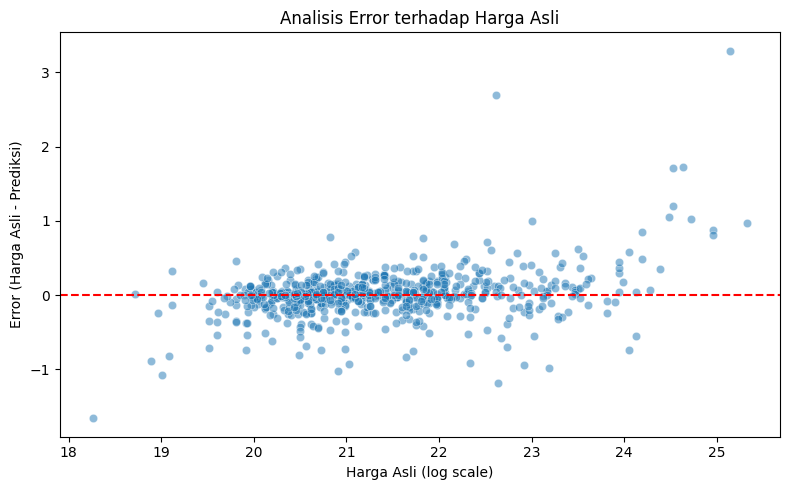

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung prediksi dan error dari model terbaik (misalnya Random Forest)
model_terbaik = Pipeline([
    ('pra-pemrosesan', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_terbaik.fit(X_train, y_train)
y_pred = model_terbaik.predict(X_test)

# Hitung residual (selisih antara nilai asli dan prediksi)
residual = y_test - y_pred

# Visualisasikan residual terhadap harga asli
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')  # Garis nol sebagai referensi
plt.xlabel("Harga Asli (log scale)")
plt.ylabel("Error (Harga Asli - Prediksi)")
plt.title("Analisis Error terhadap Harga Asli")
plt.tight_layout()
plt.show()

## **D. Visualisasi distribusi error untuk tiap model**

melihat sebaran kesalahan (error) prediksi dari setiap model. Dengan memvisualisasikan error dalam bentuk histogram, kita bisa mengetahui apakah model sering meleset terlalu tinggi, terlalu rendah, atau seimbang. Distribusi yang sempit dan simetris di sekitar nol menandakan model prediksi yang baik.

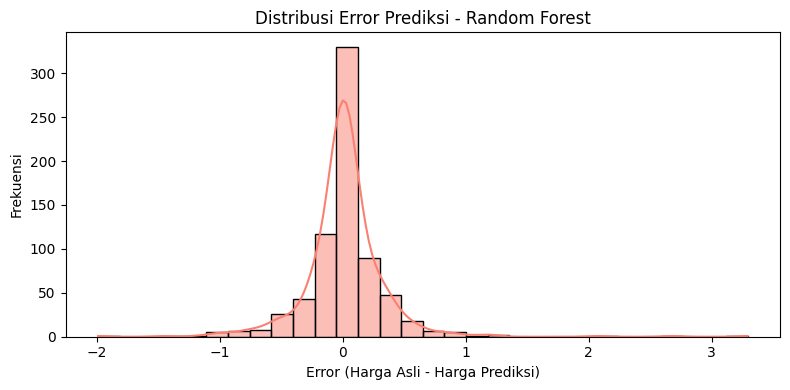

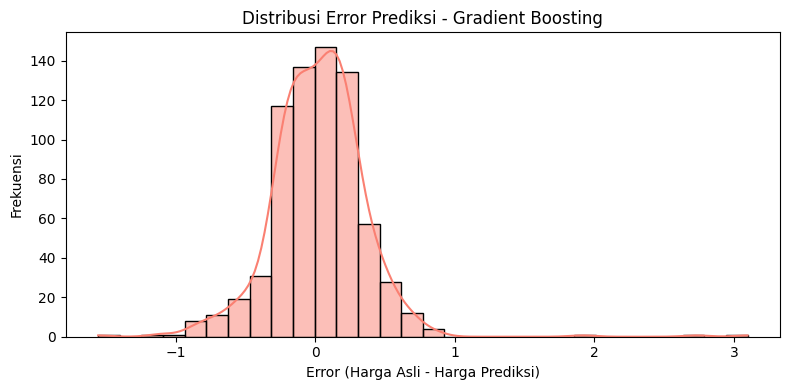

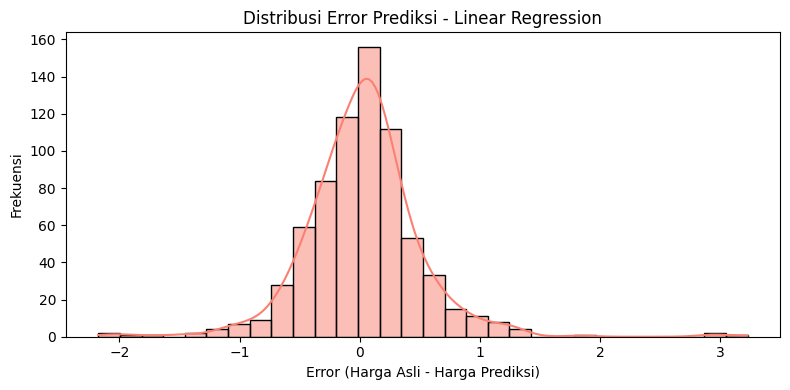

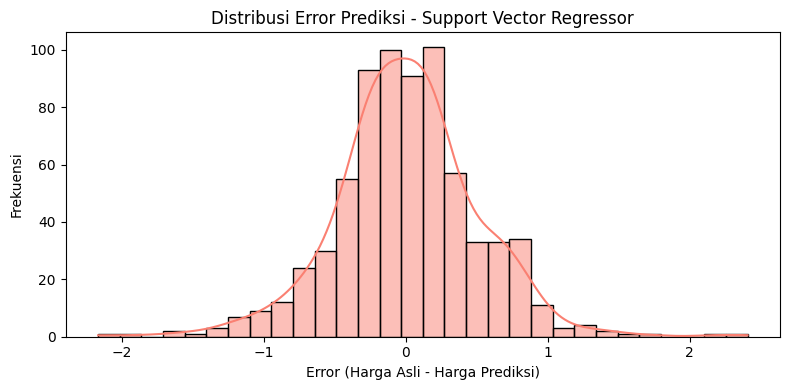

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi error untuk tiap model
for nama_model, regressor in models.items():
    pipeline = Pipeline([
        ('pra-pemrosesan', preprocessor),
        ('model', regressor)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    error = y_test - y_pred

    plt.figure(figsize=(8, 4))
    sns.histplot(error, bins=30, kde=True, color='salmon')
    plt.title(f"Distribusi Error Prediksi - {nama_model}")
    plt.xlabel("Error (Harga Asli - Harga Prediksi)")
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()


Berdasarkan distribusi error yang diamati, model Random Forest memberikan performa terbaik dengan error yang paling kecil dan distribusi paling terpusat. Gradient Boosting masih memberikan hasil yang kompetitif, sementara Linear Regression menunjukkan akurasi sedang. Sebaliknya, Support Vector Regressor memiliki performa terendah karena menghasilkan error yang paling besar dan tersebar luas. Dengan demikian, Random Forest direkomendasikan sebagai model utama untuk prediksi harga rumah pada dataset ini.